<a href="https://colab.research.google.com/github/Artcods/Artcods/blob/main/Statistika_tubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ANALISIS FAKTOR PENYEBAB OBESITAS DARI NEGARA MEKSIKO, PERU DAN KOLOMBIA**

---

Penelitian ini bertujuan untuk menganalisis faktor – faktor yang dapat
mempangaruhi tingkat obesitas dari negara Meksiko, Peru dan Kolombia berdasarkan kondisi fisik dan kebiasannya. Penulis menggunakan data yang diperoleh dari UC Irvine Machine Learning oleh Fabio Mendoza Palechor dan Alexis De la Hoz Manotas  pada tahun 2019 yang berisi 17 atribut dan  2112 record.

# **METODE** **PENELITIAN**

1. Identifikasi masalah: Penelitian ini bertujuan untuk mengidentifikasi faktor-faktor yang mempengaruhi tingkat obesitas dengan menggunakan Heatmap korelasi sebagai metode visualisasi data matriks.  Dengan menggunakan pendekatan ini, diharapkan dapat memberikan informasi yang berguna dalam memahami faktor-faktor yang berkontribusi terhadap obesitas sehingga intervensi yang lebih tepat dan efektif bisa dikembangkan guna mencegah dan mengurangi obesitas.

2. Pengumpulan data: Penelitian ini menggunakan dataset yang merupakan hasil survey pada responden di tiga negara, yaitu Meksiko, Peru dan Kolombia yang berhubungan dengan tingkat obesitas individu. Informasi yang terdapat dalam dataset tersebut diperoleh dari survey melalui platform web dimana responden mengevaluasi pola makan serta aspek lainnya terkait kondisi fisik mereka. Data yang digunakan dalam penelitian ini terdiri dari beberapa variabel seperti

3. Preprocessing data: Pada tahap ini dilakukan persiapan data sebelum dilakukan analisis dengan heatmap korelasi. Preprocessing data meliputi pembersihan data, pengubahan data menjadi bentuk yang sesuai dengan kebutuhan analisis, dan penghapusan data yang tidak valid. Pada tahap ini, setiap tabel yang mempunyai data bertipe string/text akan diubah menjadi bentuk numerikal melalui proses label encoding, sehingga masing-masing dari string/text akan menjadi deretan angka yang akan mewakili setiap variasi teks dan setiap tabel yang berisi angka desimal akan dibulatkan.

4. Analisis data: Penelitian ini dilakukan dengan menggunakan metode analisis statistik untuk mengevaluasi faktor-faktor yang mempengaruhi tingkat obesitas. Setelah data dipersiapkan, visualisasi pertama yang dilakukan adalah menggunakan pie/bar charts untuk melihat distribusi data. setelah itu, untuk menganalisis hubungan antara variabel, digunakan heatmap korelasi untuk menampilkan tingkat korelasi antara setiap pasangan variabel.   

5. Hasil dan interpretasi: Setelah dilakukan analisis data, maka dapat dilihat pola data, struktur data, dan korelasi antar data yang terplot dalam bentuk grafik. Hasil analisis kemudian ditafsirkan dan divalidasi dengan data-data yang tersedia dari sumber lain.

6. Kesimpulan: Berdasarkan hasil analisis dan interpretasi data, maka dapat ditarik kesimpulan mengenai faktor-faktor yang mempengaruhi tingkat obesitas.

### **Insight**

Analisis dan Insight


---


1. Korelasi rokok dengan NObeyesdad (SMOKE) **Hamid**
   > Korelasi Ganda variabel dependen "Rokok", "Makan Makanan Kalori Tinggi (FAVC)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah Rokok dapat mempengaruhi obesitas seseorang?"
---
2. Korelasi makanan dengan NObeyesdad (FAVC) **Nia**
   > Korelasi Ganda variabel dependen "Kalori Tinggi (FAVC)", "Riwayat Keluarga (family_history_with_overweight)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah kebanyakan makan membuat seseorang menjadi obesitas?"
---
3. Korelasi air putih dengan NObeyesdad (CH2O) **Hamid**
   > Korelasi variabel dependen "Air Putih (CH2O)" dan variabel independen "NObeyesdad" kemudian hasil analisis dapat memberikan insight "Apakah benar, jika seseorang terlalu banyak meminum air putih menyebabkan obesitas?"
---
4. Seberapa sering minum alkohol dengan NObeyesdad (CALC) **David**
   > Korelasi variabel dependen "NObeyesdad" dan variabel independen "Minum Alkohol (Always, Sometimes, Frequently, no)" kemudian hasil analisis dapat memberikan insight "Apakah seseorang pemabuk berat sudah dipastikan obesitas?"
---
5. Seberapa sering makan sayuran (FCVC)  **Nia**
   > Korelasi
---
6. Berapa banyak makanan utama sehari(NCP) **Nia**
   > Korelasi
---
7. makan makanan apa pun di antara waktu makan (CAEC) **Dani**
   > Korelasi variabel dependen "Makan Makanan Apapun diantara Waktu Makan (CAEC)" dan variabel independen "Kalori (FAVC)" kemudian hasil analisis dapat memberikan insight "Apakah, jika seorang makan makanan diantara waktu makan menyababkan naik kalori?"
---
8. memantau kalori yang Anda makan setiap hari (SCC) **David**
   > Korelasi Ganda variabel dependen "Memantau Kalori Setiap Hari" dan "Latihan Fisik (FAF)". Variabel Independen "Berat badan" kemudian hasil analisis dapat memberikan insight "Apakah seorang obesitas selalu latihan fisik dan memantau kalori dapat menurunkan berat badan?"
---
9. Seberapa sering aktifitas fisik (FAF) **Dani**
   > Korelasi variabel dependen "Sering Melakukan Aktifitas Fisik (Always)" dan variabel independen "Kalori (FAVC)" kemudian hasil analisis dapat memberikan insight "Apakah jika sering melakukan aktifitas fisik dapat menghindari makanan berkalori tinggi?"
---
10. Seberapa sering menggunakan teknologi (TUE) **David**
   > Korelasi Ganda variabel "sering menggunakan teknologi (Always)" dan "Jarang Latihan Fisik (sometimes)". Variabel independen "Berat Badan" kemudian hasil analisis dapat memberikan insight "Apakah benar. orang yang sering menggunakan teknologi dan jarang latihan fisik menyebabkan obesitas?"
---
11. Jumlah berat badan (bar chart) **Hamid**
   > Korelasi
---
12. Umur **Dani**
   > Buat sebaran nilai dengan rentang 5 (misal: 20-25) dan simpulkan berdasarkan Obesitas Level kemudian hasil analisis dapat memeberikan insight "Umur berapakah seseorang yang paling banyak memiliki obesitas?"

Keterangan


---


- **Gender**: Feature, Categorical, "Gender"
- **Age** : Feature, Continuous, "Age"
- **Height**: Feature, Continuous
- **Weight**: Feature Continuous
- **family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "

- **FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "
- **FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "
- **NCP** : Feature, Continuous, " How many main meals do you have daily? "
- **CAEC** : Feature, Categorical, " Do you eat any food between meals? "
- **SMOKE** : Feature, Binary, " Do you smoke? "
- **CH2O**: Feature, Continuous, " How much water do you drink daily? "
- **SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "
- **FAF**: Feature, Continuous, " How often do you have physical activity? "
- **TUE** : Feature, Integer, " How much time do you use technological devices - **such** as cell phone, videogames, television, computer and others? "

- **CALC** : Feature, Categorical, " How often do you drink alcohol? "
- **MTRANS** : Feature, Categorical, " Which transportation do you usually use? "
- **NObeyesdad** : Target, Categorical, "Obesity level"

### **Requirement Library/Package**


---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

### Upload Dataset


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
obesity = pd.read_csv ("https://raw.githubusercontent.com/Artcods/Artcods/main/ObesityDataSet_2112.csv")

### **Explore Data**


---



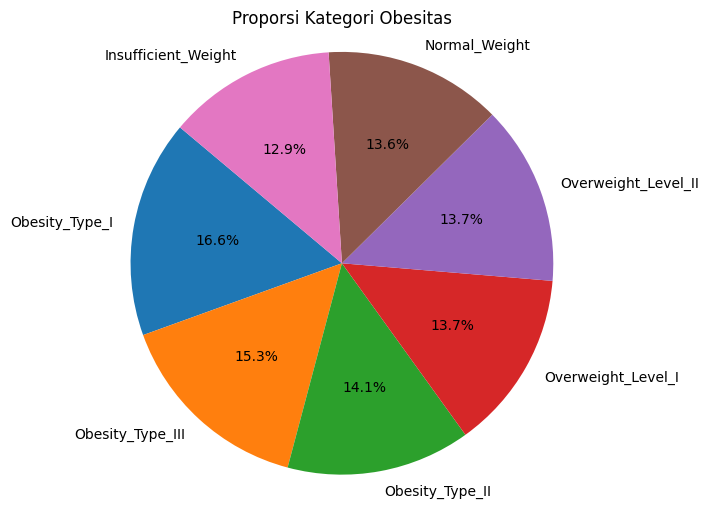

In [ ]:
# Menghitung jumlah kasus dalam setiap kategori
kategori_counts = obesity['NObeyesdad'].value_counts()

# Mapping dari label asli ke label deskriptif
label_mapping = {
    '0': 'Insufficient_Weight',
    '1': 'Normal_Weight',
    '2': 'Overweight_Level_I',
    '3': 'Overweight_Level_II',
    '4': 'Obesity_Type_I',
    '5': 'Obesity_Type_II',
    '6': 'Obesity_Type_III',
}

# Mengganti label dengan label deskriptif
descriptive_labels = [label_mapping[str(label)] for label in kategori_counts.index]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(kategori_counts, labels=descriptive_labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Kategori Obesitas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Explanatory and Visualization**

---



#### Hamid

**Korelasi rokok dengan NObeyesdad (SMOKE) hamid**

0.0034421790751232974


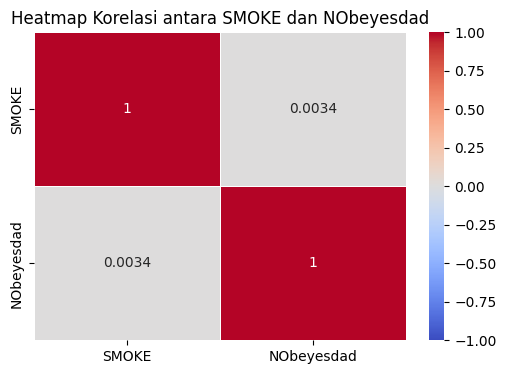

In [ ]:
correlation_smoke = obesity['SMOKE'].corr(obesity['NObeyesdad'])
print(correlation_smoke)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SMOKE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara SMOKE dan NObeyesdad')
plt.show()

**Korelasi air putih dengan berat badan (CH2O) hamid**

0.13817078773960842


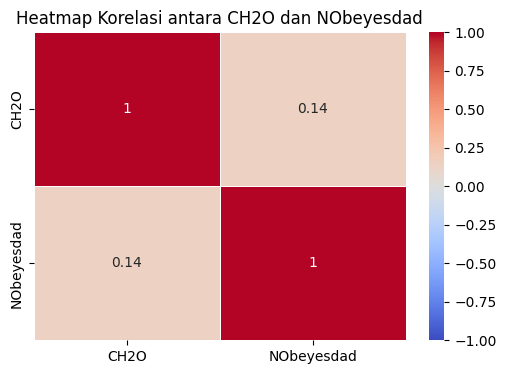

In [ ]:
correlation_ch2o = obesity['CH2O'].corr(obesity['NObeyesdad'])
print(correlation_ch2o)

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CH2O', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CH2O dan NObeyesdad')
plt.show()

**Jumlah berat badan (bar chart) Hamid**

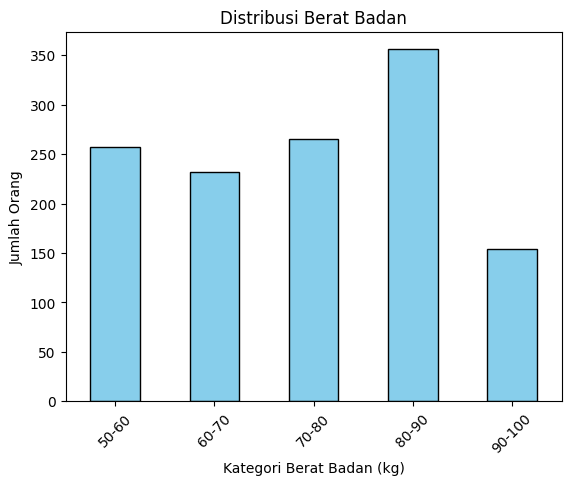

In [ ]:
# Mengambil data dari kolom 'Weight'
weights = obesity['Weight']

# Menentukan kategori berat badan
weight_bins = [50, 60, 70, 80, 90, 100]
weight_categories = ['50-60', '60-70', '70-80', '80-90', '90-100']

# Menghitung jumlah orang untuk setiap kategori berat badan
weight_counts = pd.cut(weights, bins=weight_bins, labels=weight_categories, right=False).value_counts().sort_index()

# Membuat bar chart
weight_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Kategori Berat Badan (kg)')
plt.ylabel('Jumlah Orang')
plt.title('Distribusi Berat Badan')
plt.xticks(rotation=45)
plt.show()

4    351
6    324
5    297
2    290
3    290
1    287
0    272


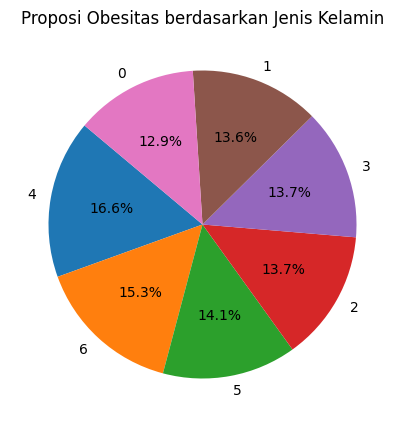

In [ ]:
# Menghitung jumlah masing-masing gander
gender_counts = obesity['NObeyesdad'].value_counts()

# Menampilkan hasil
print(gender_counts.to_string(index=True, header=False))

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Proposi Obesitas berdasarkan Jenis Kelamin')

# Menampilkan pie chart
plt.show()

#### Nia

Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: 0.2477932000502839


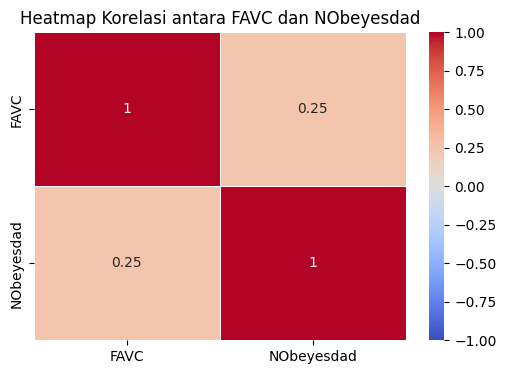

In [ ]:
# Hitung korelasi antara 'FAVC' dan 'NObeyesdad'
correlation = obesity['FAVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi makanan tinggi kalori dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAVC' dan 'NObeyesdad'
subset = obesity[['FAVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FAVC dan NObeyesdad')
plt.show()

Korelasi antara frekuensi konsums makanan utama dan obesity level: 0.020931418594241746


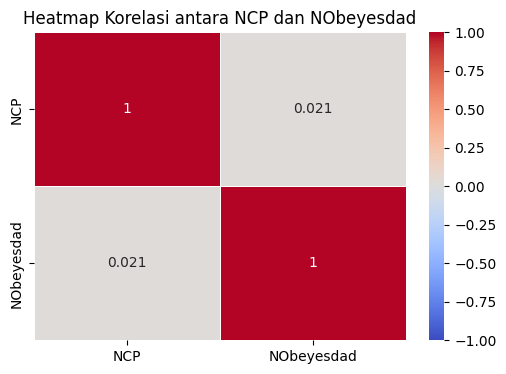

In [ ]:
# Hitung korelasi antara 'NCP' dan 'NObeyesdad'
correlation = obesity['NCP'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsums makanan utama dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'NCP' dan 'NObeyesdad'
subset = obesity[['NCP', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara NCP dan NObeyesdad')
plt.show()

Korelasi antara frekuensi konsumsi sayuran dan obesity level: 0.19570521334325744


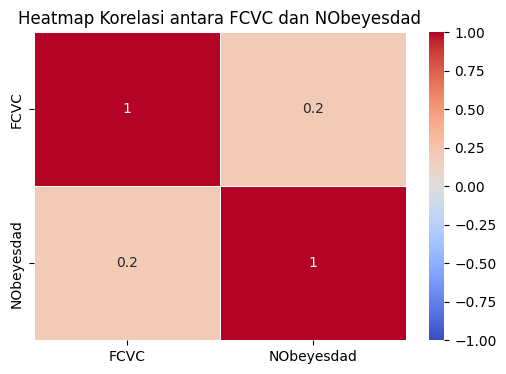

In [ ]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['FCVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi sayuran dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FCVC' dan 'NObeyesdad'
subset = obesity[['FCVC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara FCVC dan NObeyesdad')
plt.show()

Male      1068
Female    1043


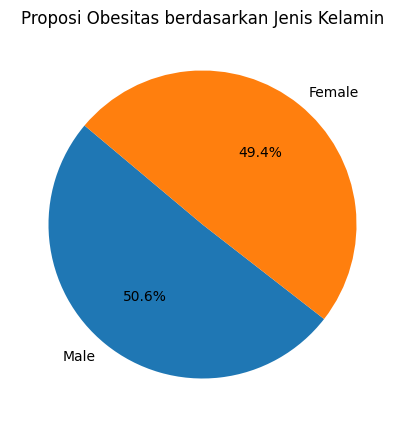

In [ ]:
# Menghitung jumlah masing-masing gander
gender_counts = obesity['Gender'].value_counts()

# Menampilkan hasil
print(gender_counts.to_string(index=True, header=False))

# Membuat pie chart
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Proposi Obesitas berdasarkan Jenis Kelamin')

# Menampilkan pie chart
plt.show()

In [ ]:
correlation = obesity['FAVC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi makanan junk food dan berat badan: {correlation}')

Korelasi antara frekuensi makanan junk food dan berat badan: 0.2477932000502839


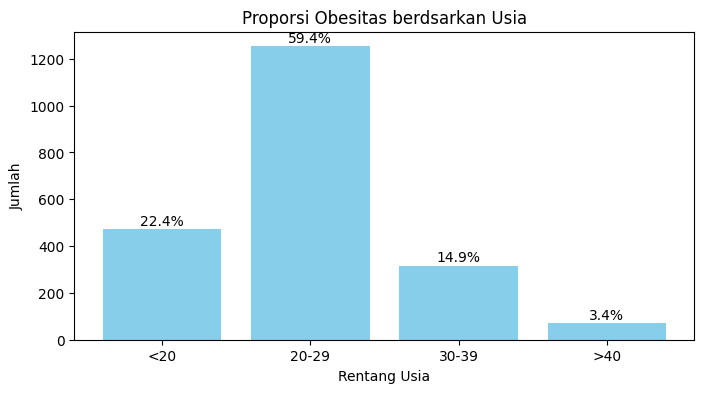

In [ ]:
# Mengelompokkan usia ke dalam rentang

bins = [0, 20, 30, 40, float('inf')]

labels = ['<20', '20-29', '30-39', '>40']

obesity['AgeGroup'] = pd.cut(obesity['Age'], bins=bins, labels=labels, right=False)

#Menghitung jumlah masing-masing rentang usia

age_group_counts = obesity['AgeGroup'].value_counts().sort_index()

# Menghitung persentase masing-masing rentang usia

age_group_percentages = (age_group_counts/age_group_counts.sum()) * 100

# Membuat bar chart

plt.figure(figsize=(8, 4))

bars = plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')

# Menambahkan persentase sebagai label pada setiap bar

for bar, percentage in zip(bars, age_group_percentages):
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.1f}%', ha='center', va='bottom')

#Menambahkan judul dan label sumbu

plt.title('Proporsi Obesitas berdsarkan Usia')

plt.xlabel('Rentang Usia')

plt.ylabel('Jumlah')

# Menampilkan bar chart

plt.show()

#### David

**Korelasi meminum alkohol (CALC) dengan obesity level**

Korelasi antara frekuensi konsumsi alkohol dan obesity level: 0.1517523222990246


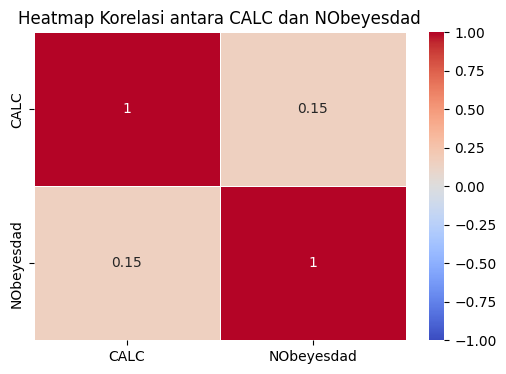

In [ ]:
# Hitung korelasi antara 'CALC' dan 'NObeyesdad'
correlation = obesity['CALC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['CALC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

**Korelasi memantau kalori yang dimakan (SCC) dengan obesity lavel**

Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : -0.19450765594046907


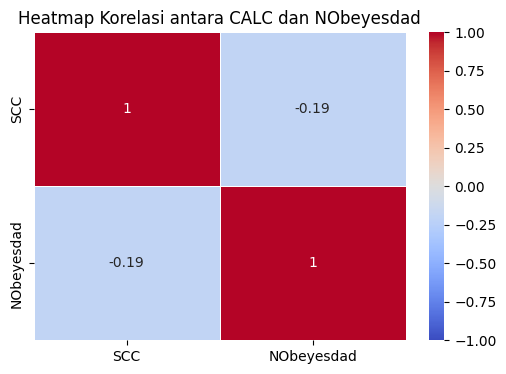

In [ ]:
correlation = obesity['SCC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi memantau kalori yang dimakan dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['SCC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

 **Korelasi menggunakan teknologi (TUE) dengan obesity lavel**

Korelasi antara frekuensi menggunakan teknologi dan obesity level : -0.07952809474559348


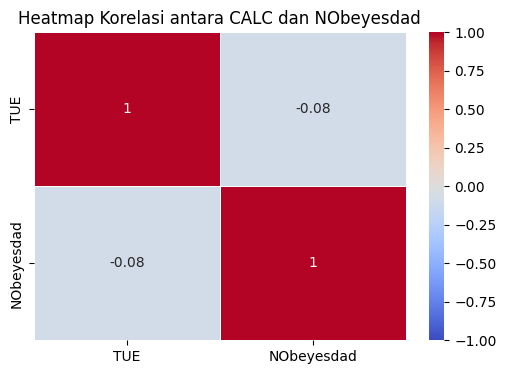

In [ ]:
correlation = obesity['TUE'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi menggunakan teknologi dan obesity level : {correlation}')

# Membuat DataFrame dengan hanya kolom 'CALC' dan 'NObeyesdad'
subset = obesity[['TUE', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

#### Dani

makan makanan apa pun di antara waktu makan(CAEC)

Korelasi antara frekuensi konsumsi alkohol dan obesity level: -0.32934971630039905


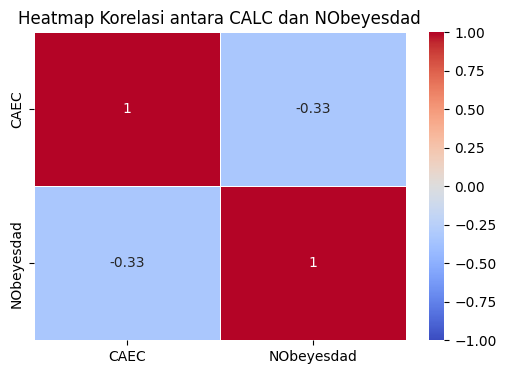

In [ ]:
# Hitung korelasi antara 'CAEC' dan 'NObeyesdad'
correlation = obesity['CAEC'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'CAEC' dan 'NObeyesdad'
subset = obesity[['CAEC', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

Seberapa sering aktifitas fisik (FAF)

Korelasi antara frekuensi konsumsi alkohol dan obesity level: -0.1971863309546405


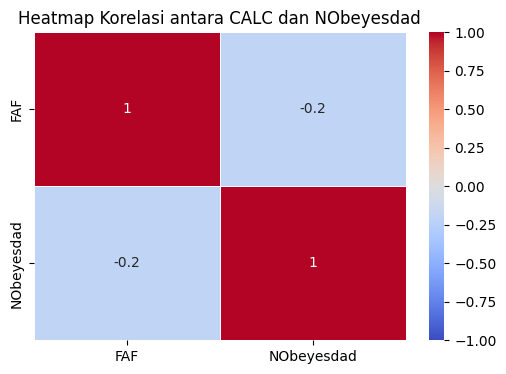

In [ ]:
# Hitung korelasi antara 'FAF' dan 'NObeyesdad'
correlation = obesity['FAF'].corr(obesity['NObeyesdad'])
print(f'Korelasi antara frekuensi konsumsi alkohol dan obesity level: {correlation}')

# Membuat DataFrame dengan hanya kolom 'FAF' dan 'NObeyesdad'
subset = obesity[['FAF', 'NObeyesdad']]

# Hitung matriks korelasi untuk subset tersebut
correlation_matrix = subset.corr()

# Plot heatmap menggunakan seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Heatmap Korelasi antara CALC dan NObeyesdad')
plt.show()

Mencari Umur terbanyak